Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


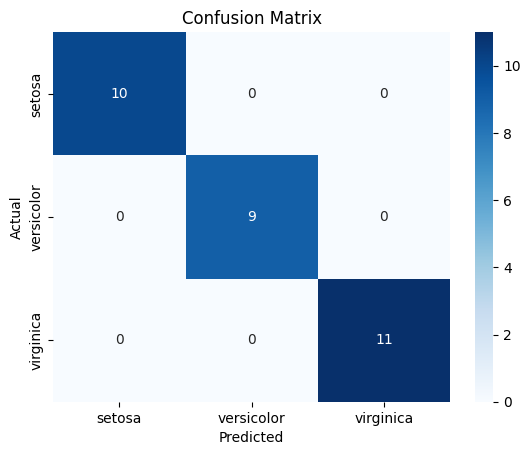

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/content/drug.csv /content/drug.csv

Model Accuracy: 1.00


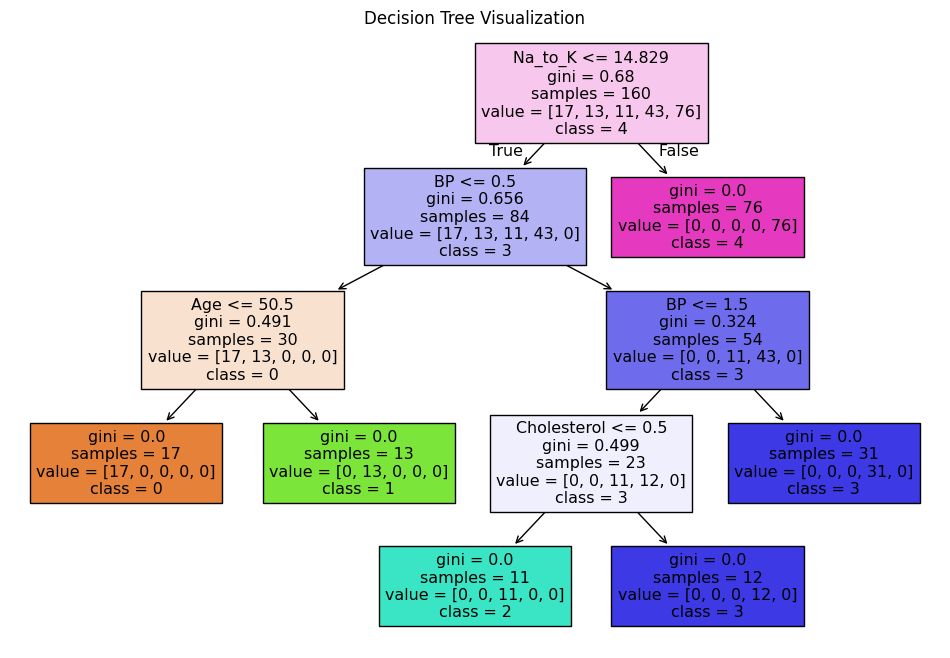

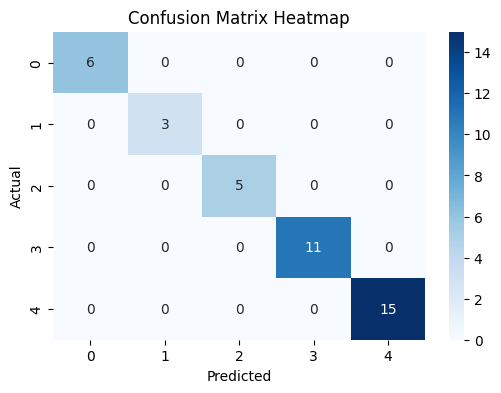

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the Drugdataset from CSV
file_path = input("/content/drug.csv ").strip()

# Read the dataset
df = pd.read_csv(file_path)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical features using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Assume last column is the target (classification label)
X = df.iloc[:, :-1].values  # Features (all columns except last)
y = df.iloc[:, -1].values   # Target (last column)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train DecisionTree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Compute accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"\nModel Accuracy: {accuracy:.2f}")

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=[str(cls) for cls in set(y)])
plt.title("Decision Tree Visualization")
plt.show()

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


/content/petrol_consumption.csv/content/petrol_consumption.csv
Dataset Preview:
   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  

Mean Absolute Error (MAE): 91.00
Mean Squared Error (MSE): 16334.60
Root Mean Squared Error (RMSE): 127.81


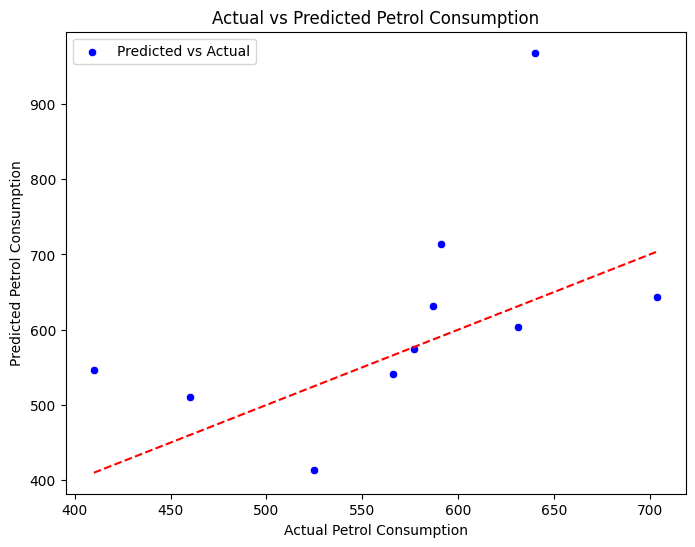

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = input("/content/petrol_consumption.csv").strip()

# Read the CSV file
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Assume last column is the target (petrol consumption)
X = df.iloc[:, :-1].values  # Features (all columns except last)
y = df.iloc[:, -1].values   # Target (last column - petrol consumption)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RegressionTree (Decision Tree for regression)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Predict on test data
y_pred = regressor.predict(X_test)

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display results
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Petrol Consumption")
plt.ylabel("Predicted Petrol Consumption")
plt.title("Actual vs Predicted Petrol Consumption")
plt.legend()
plt.show()
